<a href="https://colab.research.google.com/github/nilam576/forest_guardian/blob/main/Forest_Fire_Burned_Area_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install pandas
!pip install numpy


In [16]:
!pip install scikit_learn
!pip install matplotlib

In [18]:
import numpy
import pandas

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor


import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [19]:
import zipfile
df_zip = zipfile. ZipFile('/content/drive/MyDrive/archive (3) (1).zip')
df = pd. read_csv(df_zip. open('forestfires.csv'))

In [20]:
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [22]:
print("Statistical Description:", df.describe())

Statistical Description:                 X           Y       month         day        FFMC         DMC  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807    7.475822    4.259188   90.644681  110.872340   
std      2.313778    1.229900    2.275990    2.072929    5.520111   64.046482   
min      1.000000    2.000000    1.000000    1.000000   18.700000    1.100000   
25%      3.000000    4.000000    7.000000    2.000000   90.200000   68.600000   
50%      4.000000    4.000000    8.000000    5.000000   91.600000  108.300000   
75%      7.000000    5.000000    9.000000    6.000000   92.900000  142.400000   
max      9.000000    9.000000   12.000000    7.000000   96.200000  291.300000   

               DC         ISI        temp          RH        wind        rain  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean   547.940039    9.021663   18.889168   44.288201    4.017602    0.021663   
st

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

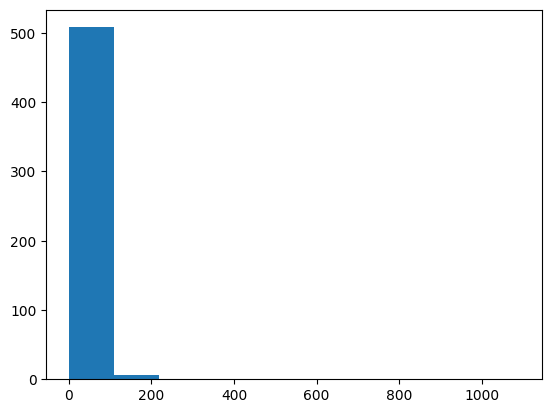

In [32]:
plt.hist((df.area))

array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>],
       [<Axes: title={'center': 'area'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

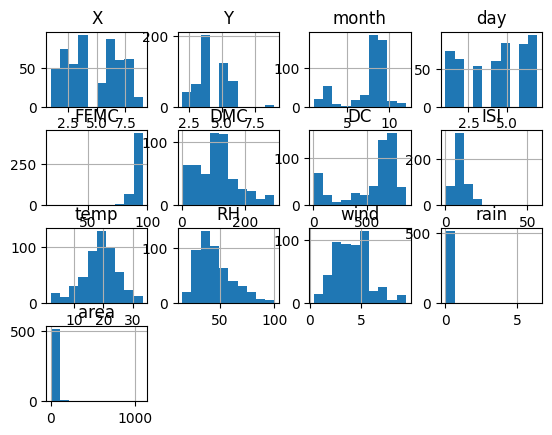

In [33]:
df.hist()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

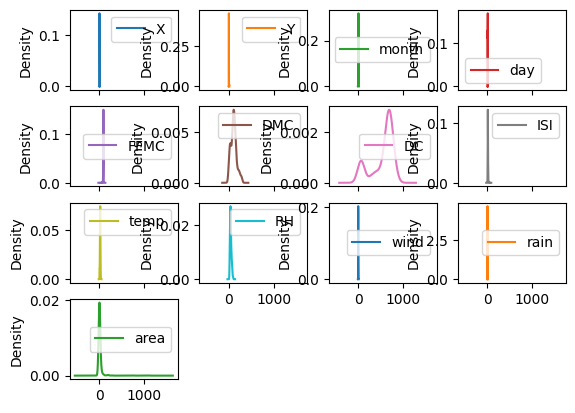

In [34]:
df.plot(kind='density', subplots=True, layout=(4,4))

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
print('Random Forest Regressor')
rfreg = RandomForestRegressor()
rfreg.fit(X, Y)
prediction_rfreg = rfreg.predict(X)
score = explained_variance_score(Y, prediction_rfreg)
mae = mean_absolute_error(Y, prediction_rfreg)
print("Score:", score)
print("Mean Absolute Error:", mae)

Random Forest Regressor
Score: 0.8473815365368667
Mean Absolute Error: 7.738900859813948
